In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [19]:
# Load the dataset
data = pd.read_csv('/content/SSH.csv')

# Display basic information about the dataset
print("Dataset Shape:", data.shape)
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Shape: (283, 13)

First 5 rows of the dataset:
      user  is_private  is_failure  is_root  is_valid  not_valid_count  \
0   kamran           1           1        0         1                0   
1   kamran           1           1        0         1                0   
2  student           1           0        0         1                0   
3   kamran           1           1        0         1                0   
4   kamran           1           1        0         1                0   

   ip_failure  ip_success  no_failure  first   td            ts  class  
0           1           0           2      1    0  1.544679e+09      0  
1           2           0           3      0   18  1.544679e+09      0  
2           0           1           0      0  133  1.544679e+09      0  
3           1           1           2      0   58  1.544679e+09      0  
4           2           1           3      0   29  1.544679e+09      0  

Missing Values:
user               0
is_private         0
is_

In [20]:
# Data Preprocessing
# Drop unnecessary columns (ts is timestamp, user is username)
X = data.drop(['user', 'class', 'ts'], axis=1)
y = data['class']

# Display class distribution
print("\nClass Distribution:")
print(y.value_counts())
print(f"Percentage of attacks: {(y.sum() / len(y)) * 100:.2f}%")


Class Distribution:
class
0    216
1     67
Name: count, dtype: int64
Percentage of attacks: 23.67%


In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [22]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (226, 10)
Testing set shape: (57, 10)


In [23]:
# Train the Random Forest model
print("\n=== Random Forest Classifier ===")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)


=== Random Forest Classifier ===


RandomForestClassifier(random_state=42)

In [24]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [26]:
# Generate classification report
report = classification_report(y_test, y_pred)

In [27]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.87      1.00      0.93        13

    accuracy                           0.96        57
   macro avg       0.93      0.98      0.95        57
weighted avg       0.97      0.96      0.97        57



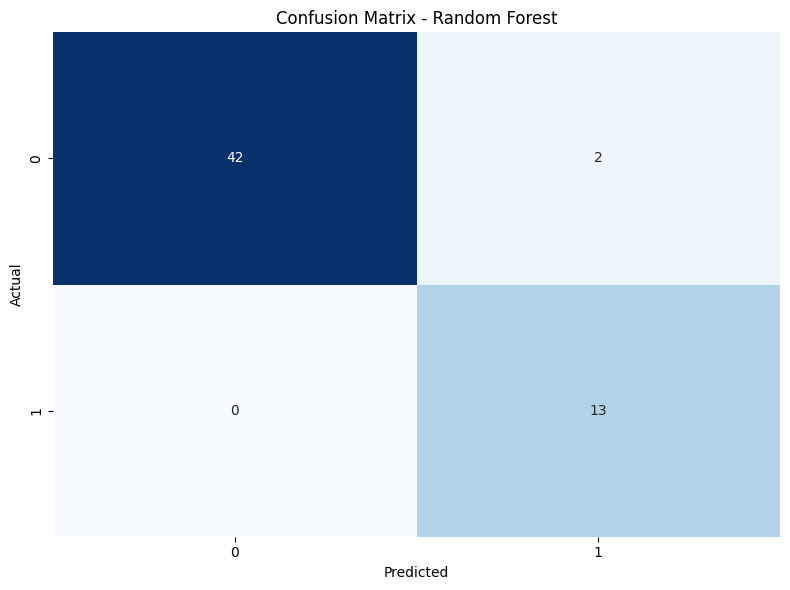

In [28]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

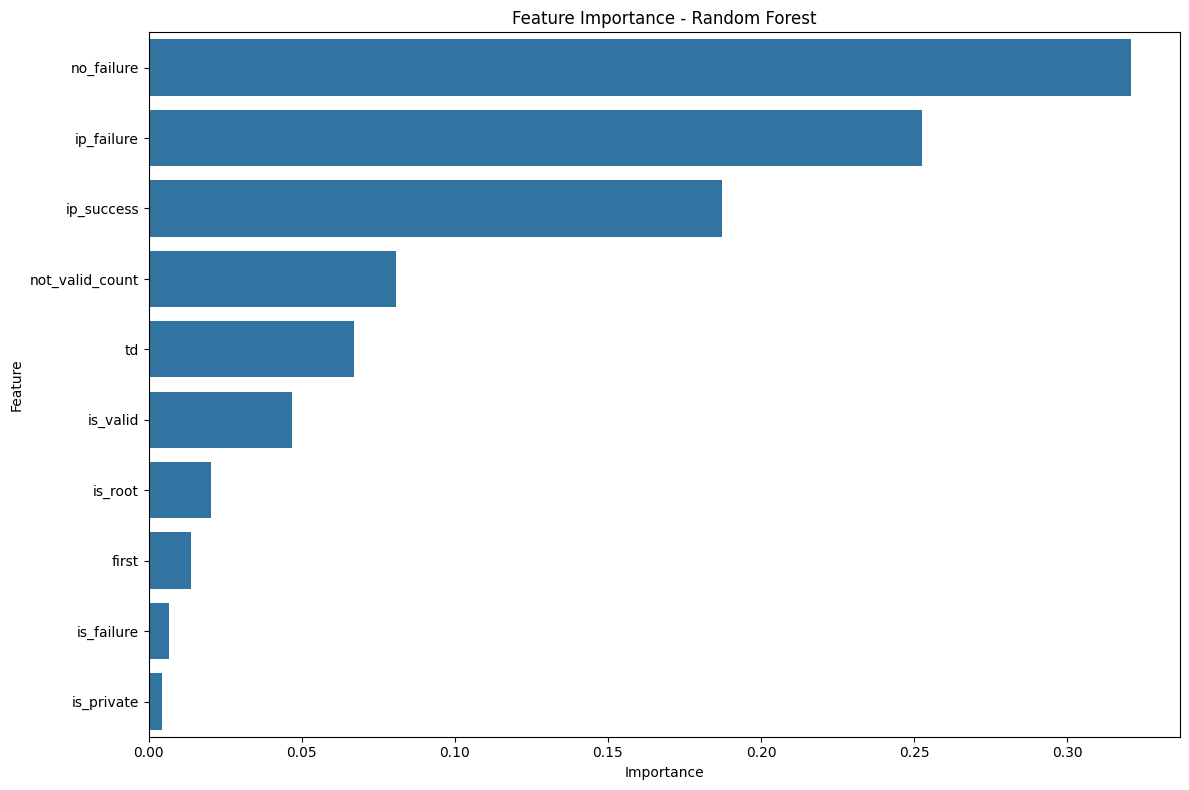


Top 5 Most Important Features:
           Feature  Importance
7       no_failure    0.320809
5       ip_failure    0.252460
6       ip_success    0.187117
4  not_valid_count    0.080675
9               td    0.066941


In [29]:
# Feature importance
feature_importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(importance_df.head())

In [30]:
# Save the model
import joblib
joblib.dump(rf_model, 'random_forest_ssh_attack_classifier.pkl')
joblib.dump(scaler, 'ssh_scaler.pkl')
print("\nRandom Forest model and scaler saved successfully.")


Random Forest model and scaler saved successfully.
